In [1]:
import sys
import os
project_dir = os.path.abspath("/bsuhome/ksilwimba/scratch/clm5-lai-ppe-ednn/temporal_ppe_emulation/scripts")
#---------- Define paths for the specific subfolders
data_scripts_path = os.path.join(project_dir, "data_processing")
model_scripts_path = os.path.join(project_dir, "model")
#---------- Append the subfolder paths to sys.path
sys.path.append(data_scripts_path)
sys.path.append(model_scripts_path)

In [2]:
from packages import*

2025-04-08 09:32:39.280270: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-08 09:32:39.342421: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-08 09:32:40.596933: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from monthly_data_loader import x_input, y_input
from global_mean import  global_mean
from temporal_ednn import ednn_reg_model

## Load LAI Data

In [4]:
#---------- Compute CLM PPE monthly data
clm_ppe_path = "/bsuhome/ksilwimba/scratch/NCAR/Data/LAI/TLAI"

#---------- Training data from 1901 to 2000
monthly_data_tr = y_input(clm_ppe_path, start_year=1901, end_year=2000)

#---------- Validation data from 2000 to 2014
monthly_data_va = y_input(clm_ppe_path, start_year=2000, end_year=2014)

In [5]:
monthly_data_tr[0]

<xarray.Dataset>
Dimensions:  (gridcell: 77, sample: 50000)
Coordinates:
  * sample   (sample) object MultiIndex
  * member   (sample) int64 1 1 1 1 1 1 1 1 ... 500 500 500 500 500 500 500 500
  * time     (sample) object 1901-01-01 00:00:00 ... 2000-01-01 00:00:00
Dimensions without coordinates: gridcell
Data variables:
    TLAI     (gridcell, sample) float32 dask.array<chunksize=(77, 500), meta=np.ndarray>

## Load PPE Data and Transform

In [6]:
param_file_path = "/bsuhome/ksilwimba/scratch/NCAR/Data/helpers/lhc220926.txt"

#---------- Create X-train input --------------
#-------------- Scaled X train ----------------
scaler_x = StandardScaler()
x_jan_tr = scaler_x.fit_transform(x_input(monthly_data_tr[0], param_file_path))
x_feb_tr = scaler_x.fit_transform(x_input(monthly_data_tr[1], param_file_path))
x_mar_tr = scaler_x.fit_transform(x_input(monthly_data_tr[2], param_file_path))
x_apr_tr = scaler_x.fit_transform(x_input(monthly_data_tr[3], param_file_path))
x_may_tr = scaler_x.fit_transform(x_input(monthly_data_tr[4], param_file_path))
x_jun_tr = scaler_x.fit_transform(x_input(monthly_data_tr[5], param_file_path))
x_jul_tr = scaler_x.fit_transform(x_input(monthly_data_tr[6], param_file_path))
x_aug_tr = scaler_x.fit_transform(x_input(monthly_data_tr[7], param_file_path))
x_sep_tr = scaler_x.fit_transform(x_input(monthly_data_tr[8], param_file_path))
x_oct_tr = scaler_x.fit_transform(x_input(monthly_data_tr[9], param_file_path))
x_nov_tr = scaler_x.fit_transform(x_input(monthly_data_tr[10], param_file_path))
x_dec_tr = scaler_x.fit_transform(x_input(monthly_data_tr[11], param_file_path))

#------------- Create X-train input ------------
x_jan_va = scaler_x.transform(x_input(monthly_data_va[0], param_file_path))
x_feb_va = scaler_x.transform(x_input(monthly_data_va[1], param_file_path))
x_mar_va = scaler_x.transform(x_input(monthly_data_va[2], param_file_path))
x_apr_va = scaler_x.transform(x_input(monthly_data_va[3], param_file_path))
x_may_va = scaler_x.transform(x_input(monthly_data_va[4], param_file_path))
x_jun_va = scaler_x.transform(x_input(monthly_data_va[5], param_file_path))
x_jul_va = scaler_x.transform(x_input(monthly_data_va[6], param_file_path))
x_aug_va = scaler_x.transform(x_input(monthly_data_va[7], param_file_path))
x_sep_va = scaler_x.transform(x_input(monthly_data_va[8], param_file_path))
x_oct_va = scaler_x.transform(x_input(monthly_data_va[9], param_file_path))
x_nov_va = scaler_x.transform(x_input(monthly_data_va[10], param_file_path))
x_dec_va = scaler_x.transform(x_input(monthly_data_va[11], param_file_path))

## Compute Global Mean 

In [7]:
#----------- Area weight 
land_area = xr.open_dataset('/bsuhome/ksilwimba/scratch/NCAR/Data/helpers/sparsegrid_landarea.nc').landarea

#----------- Train Y global mean 
jan_tr_gmean = global_mean(monthly_data_tr[0], land_area).TLAI.values.reshape(-1,1)
feb_tr_gmean = global_mean(monthly_data_tr[1], land_area).TLAI.values.reshape(-1,1)
mar_tr_gmean = global_mean(monthly_data_tr[2], land_area).TLAI.values.reshape(-1,1)
apr_tr_gmean = global_mean(monthly_data_tr[3], land_area).TLAI.values.reshape(-1,1)
may_tr_gmean = global_mean(monthly_data_tr[4], land_area).TLAI.values.reshape(-1,1)
jun_tr_gmean = global_mean(monthly_data_tr[5], land_area).TLAI.values.reshape(-1,1)
jul_tr_gmean = global_mean(monthly_data_tr[6], land_area).TLAI.values.reshape(-1,1)
aug_tr_gmean = global_mean(monthly_data_tr[7], land_area).TLAI.values.reshape(-1,1)
sep_tr_gmean = global_mean(monthly_data_tr[8], land_area).TLAI.values.reshape(-1,1)
oct_tr_gmean = global_mean(monthly_data_tr[9], land_area).TLAI.values.reshape(-1,1)
nov_tr_gmean = global_mean(monthly_data_tr[10], land_area).TLAI.values.reshape(-1,1)
dec_tr_gmean = global_mean(monthly_data_tr[11], land_area).TLAI.values.reshape(-1,1)

#----------- Validation Y global mean 
jan_va_gmean = global_mean(monthly_data_va[0], land_area).TLAI.values.reshape(-1,1)
feb_va_gmean = global_mean(monthly_data_va[1], land_area).TLAI.values.reshape(-1,1)
mar_va_gmean = global_mean(monthly_data_va[2], land_area).TLAI.values.reshape(-1,1)
apr_va_gmean = global_mean(monthly_data_va[3], land_area).TLAI.values.reshape(-1,1)
may_va_gmean = global_mean(monthly_data_va[4], land_area).TLAI.values.reshape(-1,1)
jun_va_gmean = global_mean(monthly_data_va[5], land_area).TLAI.values.reshape(-1,1)
jul_va_gmean = global_mean(monthly_data_va[6], land_area).TLAI.values.reshape(-1,1)
aug_va_gmean = global_mean(monthly_data_va[7], land_area).TLAI.values.reshape(-1,1)
sep_va_gmean = global_mean(monthly_data_va[8], land_area).TLAI.values.reshape(-1,1)
oct_va_gmean = global_mean(monthly_data_va[9], land_area).TLAI.values.reshape(-1,1)
nov_va_gmean = global_mean(monthly_data_va[10], land_area).TLAI.values.reshape(-1,1)
dec_va_gmean = global_mean(monthly_data_va[11], land_area).TLAI.values.reshape(-1,1)

## EDNN Model 

## Train EDNN Model 

In [8]:
# n_layer = 2
# loss_weight = 0.5
# n_epochs = 16
n_layer = 2
loss_weight = 0.1
n_epochs = 18
model_folder = "/bsuhome/ksilwimba/scratch/clm5-lai-ppe-ednn/temporal_ppe_emulation/saved_model"

#---------- Train  jan month
model_path = model_folder+"/jan_ednn_model.keras"
p_with_unc_jan, p_without_unc_jan, model_jan, history_jan = ednn_reg_model(
    x_jan_tr,
    jan_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train feb month
model_path = model_folder+"/feb_ednn_reg_model.keras"
p_with_unc_feb, p_without_unc_feb, model_feb, history_feb = ednn_reg_model(
    x_feb_tr,
    feb_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train  mar month
model_path = model_folder+"/mar_ednn_model.keras"
p_with_unc_mar, p_without_unc_mar, model_mar, history_mar = ednn_reg_model(
    x_mar_tr,
    mar_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train apr month
model_path = model_folder+"/apr_ednn_model.keras"
p_with_unc_apr, p_without_unc_apr, model_apr, history_apr = ednn_reg_model(
    x_apr_tr,
    apr_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train may month
model_path = model_folder+"/may_ednn_model.keras"
p_with_unc_may, p_without_unc_may, model_may, history_may = ednn_reg_model(
    x_may_tr,
    may_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train may month
model_path = model_folder+"/jun_ednn_model.keras"
p_with_unc_jun, p_without_unc_jun, model_jun, history_jun = ednn_reg_model(
    x_jun_tr,
    jun_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train jul month
model_path = model_folder+"/jul_ednn_model.keras"
p_with_unc_jul, p_without_unc_jul, model_jul, history_jul = ednn_reg_model(
    x_jul_tr,
    jul_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train aug month
model_path = model_folder+"/aug_ednn_model.keras"
p_with_unc_aug, p_without_unc_aug, model_aug, history_aug = ednn_reg_model(
    x_aug_tr,
    aug_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train sep month
model_path = model_folder+"/sep_ednn_model.keras"
p_with_unc_sep, p_without_unc_sep, model_sep, history_sep = ednn_reg_model(
    x_sep_tr,
    sep_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train oct month
model_path = model_folder+"/oct_ednn_model.keras"
p_with_unc_oct, p_without_unc_oct, model_oct, history_oct = ednn_reg_model(
    x_oct_tr,
    oct_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train Nov month
model_path = model_folder+"/nov_ednn_model.keras"
p_with_unc_nov, p_without_unc_nov, model_nov, history_nov = ednn_reg_model(
    x_nov_tr,
    nov_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

#---------- Train dec month
model_path = model_folder+"/dec_ednn_model.keras"
p_with_unc_dec, p_without_unc_dec, model_dec, history_dec = ednn_reg_model(
    x_dec_tr,
    dec_tr_gmean,
    model_path,
    hidden_layers=n_layer,
    epochs=n_epochs,
    loss_weight=loss_weight
)

Epoch 1/18
34/34 - 1s - 34ms/step - loss: 1.0325 - mse: 0.5968
Epoch 2/18
34/34 - 0s - 3ms/step - loss: -4.1137e-01 - mse: 2.0750
Epoch 3/18
34/34 - 0s - 3ms/step - loss: -1.4838e+00 - mse: 4.2979
Epoch 4/18
34/34 - 0s - 3ms/step - loss: -1.9743e+00 - mse: 5.4971
Epoch 5/18
34/34 - 0s - 2ms/step - loss: -2.2177e+00 - mse: 6.5066
Epoch 6/18
34/34 - 0s - 3ms/step - loss: -2.4205e+00 - mse: 7.2906
Epoch 7/18
34/34 - 0s - 2ms/step - loss: -2.4709e+00 - mse: 7.6009
Epoch 8/18
34/34 - 0s - 2ms/step - loss: -2.5421e+00 - mse: 8.0236
Epoch 9/18
34/34 - 0s - 3ms/step - loss: -2.5723e+00 - mse: 8.2471
Epoch 10/18
34/34 - 0s - 3ms/step - loss: -2.6101e+00 - mse: 8.4603
Epoch 11/18
34/34 - 0s - 2ms/step - loss: -2.6026e+00 - mse: 8.6646
Epoch 12/18
34/34 - 0s - 3ms/step - loss: -2.6274e+00 - mse: 8.6052
Epoch 13/18
34/34 - 0s - 2ms/step - loss: -2.6692e+00 - mse: 8.9287
Epoch 14/18
34/34 - 0s - 2ms/step - loss: -2.6213e+00 - mse: 8.8585
Epoch 15/18
34/34 - 0s - 2ms/step - loss: -2.7106e+00 - mse: 

In [9]:
p_with_unc_dec, p_without_unc_dec, model_dec, history_dec

(array([[4.4270158e-01, 1.4911772e-04, 3.9866580e-05],
        [4.4386935e-01, 1.4931193e-04, 3.9896746e-05],
        [4.4503701e-01, 1.4950703e-04, 3.9927116e-05],
        ...,
        [4.0961578e-01, 2.8118878e-04, 9.8347715e-05],
        [4.1043311e-01, 2.8133483e-04, 9.8384691e-05],
        [4.1125044e-01, 2.8148064e-04, 9.8421566e-05]], dtype=float32),
 array([[4.4270158e-01, 3.7404189e+00, 6.7475882e+00, 9.4789354e-04],
        [4.4386935e-01, 3.7424588e+00, 6.7485361e+00, 9.4928459e-04],
        [4.4503701e-01, 3.7444987e+00, 6.7494845e+00, 9.5068186e-04],
        ...,
        [4.0961578e-01, 2.8591287e+00, 5.3048272e+00, 1.3387465e-03],
        [4.1043311e-01, 2.8595388e+00, 5.3054757e+00, 1.3396437e-03],
        [4.1125044e-01, 2.8599489e+00, 5.3061233e+00, 1.3405395e-03]],
       dtype=float32),
 <EvidentialRegressorDNN name=evidential_regressor_dnn_11, built=True>,
 <keras.src.callbacks.history.History at 0x2aafa073b8d0>)

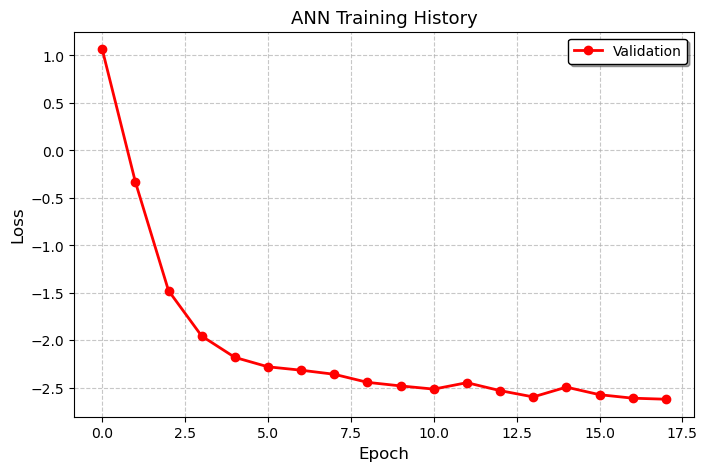

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(history_dec.epoch, history_dec.history['loss'], label='Validation', marker='o', linestyle='-', linewidth=2, color='red')
# plt.plot(history_dec.epoch, history_dec.history['mse'], label='Train', marker='o', linestyle='--', linewidth=2, color='blue')
plt.legend(shadow = True, edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Loss', fontsize = 12)
plt.xlabel('Epoch', fontsize=12)
plt.title('ANN Training History', fontsize=13)
plt.savefig("./Figures/TSgrid_mse_anom.pdf", bbox_inches='tight')
plt.show()

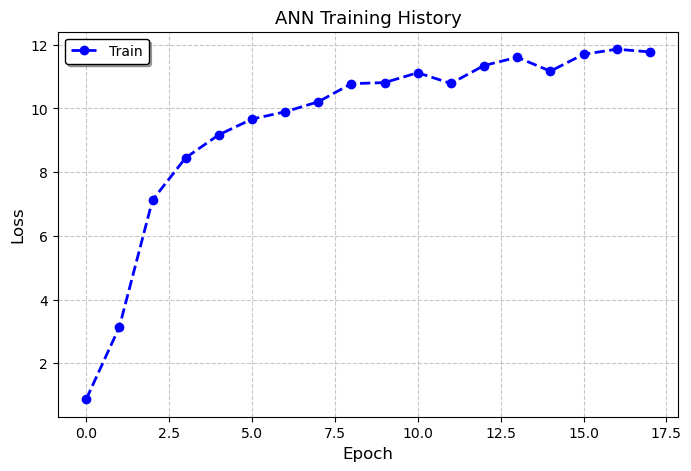

In [11]:
plt.figure(figsize=(8, 5))
# plt.plot(history_dec.epoch, history_dec.history['loss'], label='Validation', marker='o', linestyle='-', linewidth=2, color='red')
plt.plot(history_dec.epoch, history_dec.history['mse'], label='Train', marker='o', linestyle='--', linewidth=2, color='blue')
plt.legend(shadow = True, edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Loss', fontsize = 12)
plt.xlabel('Epoch', fontsize=12)
plt.title('ANN Training History', fontsize=13)
plt.savefig("./Figures/TSgrid_mse_anom.pdf", bbox_inches='tight')
plt.show()

In [12]:
#---------- Define the list of month abbreviations in order
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#---------- Map each month to its respective model and validation data
models = {
    'jan': model_jan,
    'feb': model_feb,
    'mar': model_mar,
    'apr': model_apr,
    'may': model_may,
    'jun': model_jun,
    'jul': model_jul,
    'aug': model_aug,
    'sep': model_sep,
    'oct': model_oct,
    'nov': model_nov,
    'dec': model_dec
}

x_va = {
    'jan': x_jan_va,
    'feb': x_feb_va,
    'mar': x_mar_va,
    'apr': x_apr_va,
    'may': x_may_va,
    'jun': x_jun_va,
    'jul': x_jul_va,
    'aug': x_aug_va,
    'sep': x_sep_va,
    'oct': x_oct_va,
    'nov': x_nov_va,
    'dec': x_dec_va
}

#---------- Generate predictions for each month using a loop
predictions = {}
for month in months:
    #---------- Retrieve the appropriate model and validation data for the current month
    current_model = models[month]
    current_x_va = x_va[month]
    
    #---------- Generate predictions with uncertainties for the current month
    predictions[month] = current_model.predict(current_x_va, return_uncertainties=True)

#---------- Assign individual monthly predictions to variables for convenience
jan_pred = predictions['jan']
feb_pred = predictions['feb']
mar_pred = predictions['mar']
apr_pred = predictions['apr']
may_pred = predictions['may']
jun_pred = predictions['jun']
jul_pred = predictions['jul']
aug_pred = predictions['aug']
sep_pred = predictions['sep']
oct_pred = predictions['oct']
nov_pred = predictions['nov']
dec_pred = predictions['dec']

#---------- Optionally, display prediction shapes for verification
for month in months:
    print(f"{month.upper()} prediction shape: {predictions[month].shape}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
JAN prediction shape: (7500, 3)
FEB prediction shape: (7500, 3)
MAR prediction shape: (7500, 3)
APR prediction shape: (7500, 3)
MAY prediction shape: (7500, 3)
JUN prediction shape: (7500, 3)
JUL prediction shape: (7500, 3)
AUG prediction shape: (7500, 3)
SEP prediction shape: (7500, 3)
OCT prediction shape: (7500, 3)
NOV prediction shape: (7500, 3)
DEC prediction shape: (7500, 3)


## Convert to DataFrame

In [13]:
# =============================================================================
# PPE Data Frame
# =============================================================================
#---------- Define the list of month abbreviations in order
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#---------- Create an empty dictionary to store each month's PPE prediction DataFrame
ppe_predictions = {}

#---------- Loop over each month index to build its DataFrame
for i, m in enumerate(months):
    #---------- Extract member and time arrays from monthly_data_va
    month_data = monthly_data_va[i]
    members = month_data.member.values
    times = month_data.time.values

    #---------- Retrieve the corresponding EDNN prediction and CLM global mean variables
    # These variables are retrieved dynamically from the global scope.
    pred = globals()[f"{m}_pred"]
    clm_mean = globals()[f"{m}_va_gmean"].squeeze()

    #---------- Construct the DataFrame for the current month
    df = pd.DataFrame({
        "member": members,
        "time": times,
        f"{m}_ednn": pred[:, 0].squeeze(),
        f"{m}_clm": clm_mean,
        f"{m}_ednn_alea": pred[:, 1].squeeze(),
        f"{m}_ednn_epis": pred[:, 2].squeeze()
    })

    #---------- Store the resulting DataFrame in the dictionary
    ppe_predictions[m] = df

#---------- Assign each monthly DataFrame to individual variables
jan_ppe_pred = ppe_predictions['jan']
feb_ppe_pred = ppe_predictions['feb']
mar_ppe_pred = ppe_predictions['mar']
apr_ppe_pred = ppe_predictions['apr']
may_ppe_pred = ppe_predictions['may']
jun_ppe_pred = ppe_predictions['jun']
jul_ppe_pred = ppe_predictions['jul']
aug_ppe_pred = ppe_predictions['aug']
sep_ppe_pred = ppe_predictions['sep']
oct_ppe_pred = ppe_predictions['oct']
nov_ppe_pred = ppe_predictions['nov']
dec_ppe_pred = ppe_predictions['dec']

#---------- Optionally, combine all monthly DataFrames into one large DataFrame for analysis
all_months_df = pd.concat(list(ppe_predictions.values()), ignore_index=True)

#---------- Example outputs for verification
print("January PPE Predictions:")
print(jan_ppe_pred.head())
print("Combined PPE Predictions DataFrame shape:", all_months_df.shape)


January PPE Predictions:
   member                 time  jan_ednn   jan_clm  jan_ednn_alea  \
0       1  2000-01-01 00:00:00  0.509311  0.547562       0.000056   
1       1  2001-01-01 00:00:00  0.510658  0.516597       0.000055   
2       1  2002-01-01 00:00:00  0.512006  0.508780       0.000055   
3       1  2003-01-01 00:00:00  0.513353  0.511222       0.000055   
4       1  2004-01-01 00:00:00  0.514701  0.512882       0.000054   

   jan_ednn_epis  
0       0.000015  
1       0.000014  
2       0.000014  
3       0.000014  
4       0.000014  
Combined PPE Predictions DataFrame shape: (90000, 50)


## Monthly Plot

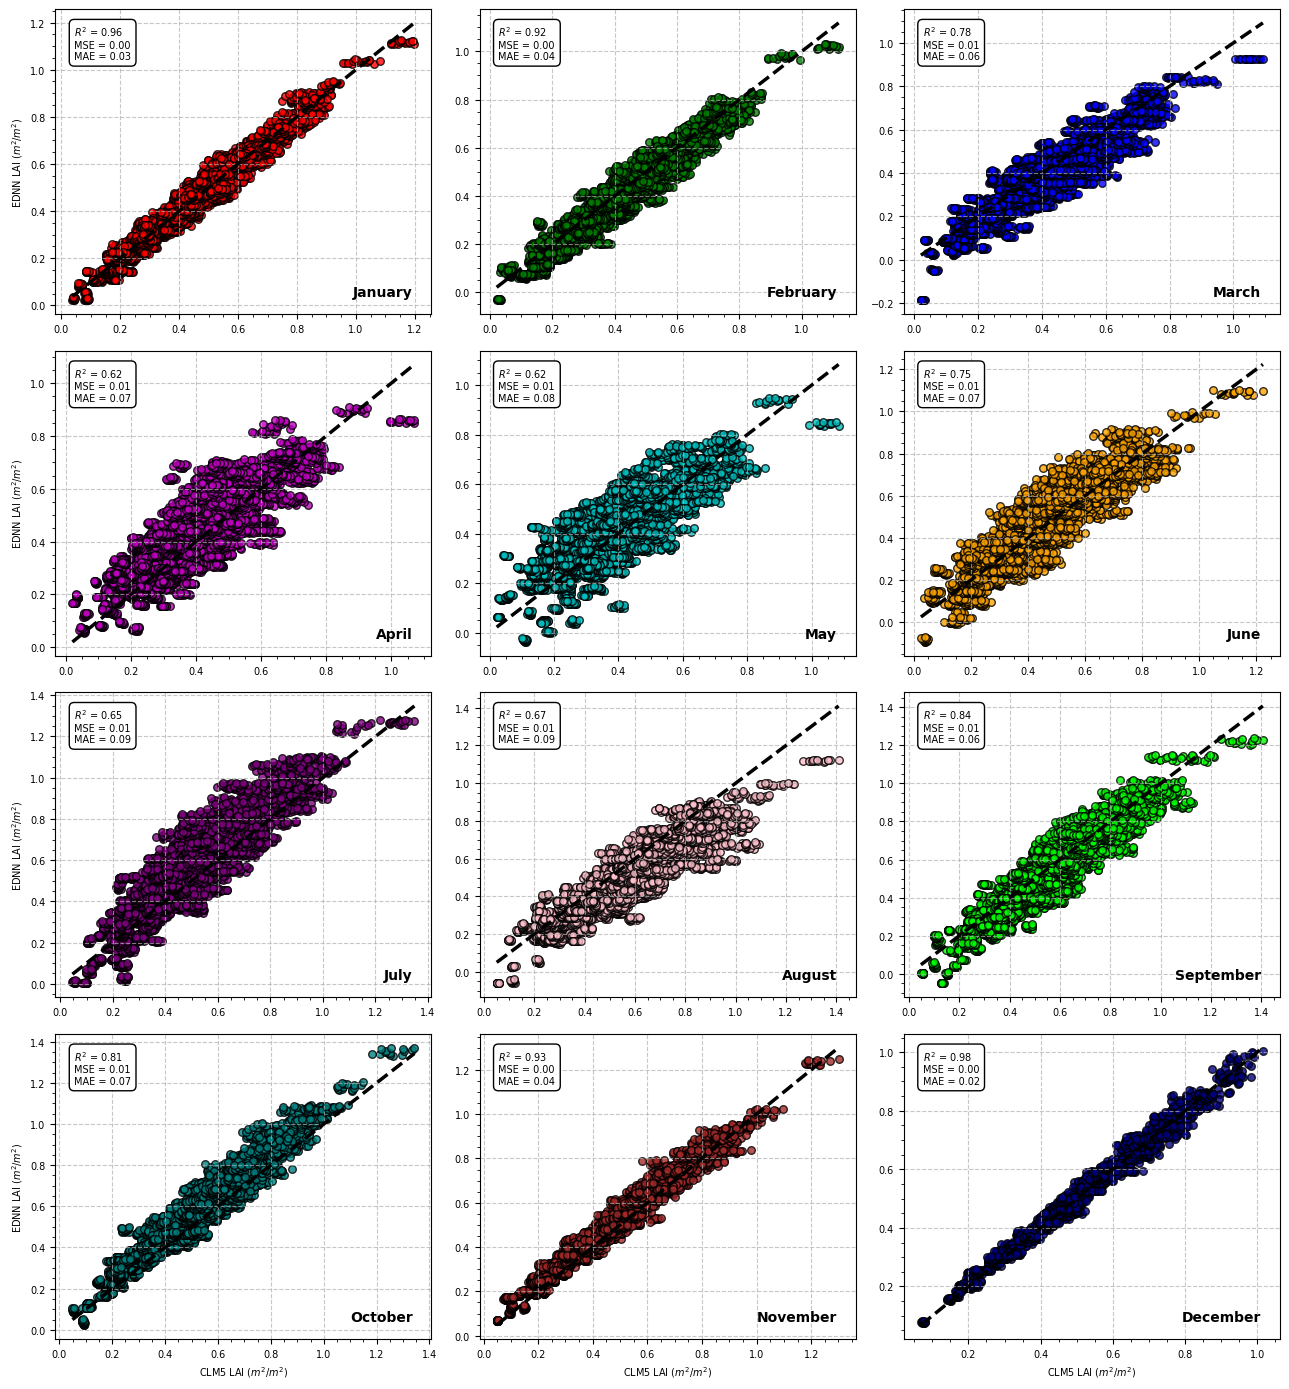

In [14]:
# =============================================================================
# Monthl Scatter Plots
# =============================================================================

#---------- Filter data by 'member' column for each month
# Each tuple corresponds to: (DataFrame, total members)
filtered_months = {
    "January":   (jan_ppe_pred, 500),
    "February":  (feb_ppe_pred, 500),
    "March":     (mar_ppe_pred, 500),
    "April":     (apr_ppe_pred, 500),
    "May":       (may_ppe_pred, 500),
    "June":      (jun_ppe_pred, 500),
    "July":      (jul_ppe_pred, 500),
    "August":    (aug_ppe_pred, 500),
    "September": (sep_ppe_pred, 500),
    "October":   (oct_ppe_pred, 500),
    "November":  (nov_ppe_pred, 500),
    "December":  (dec_ppe_pred, 200)
}

#---------- Define a list of distinct colors for each month
colors = ['r', 'g', 'b', 'm', 'c', 'orange', 'purple', 'pink', 'lime', 'teal', 'brown', 'navy']

#---------- Create a dictionary to store each month's filtered DataFrame and corresponding column names
monthly_pred = {
    month: {
        "df": data[data['member'].isin(range(1, members))],
        "color": colors[i],
        "model_col": f"{month[:3].lower()}_clm",
        "ednn_col": f"{month[:3].lower()}_ednn"
    }
    for i, (month, (data, members)) in enumerate(filtered_months.items())
}

#---------- Create a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(13, 14))
axes = axes.flatten()

#---------- Loop through each month's data and create a scatter plot
for i, (month, info) in enumerate(monthly_pred.items()):
    ax = axes[i]
    df = info["df"]
    
    #---------- Compute regression metrics
    r2_value = r2_score(df[info["model_col"]], df[info["ednn_col"]])
    mse_value = mean_squared_error(df[info["model_col"]], df[info["ednn_col"]])
    mae_value = mean_absolute_error(df[info["model_col"]], df[info["ednn_col"]])
    
    #---------- Determine the minimum and maximum values of the model predictions for 1:1 line plotting
    season_min = np.min(df[info["model_col"]])
    season_max = np.max(df[info["model_col"]])
    
    #---------- Scatter plot with enhanced marker styling
    ax.scatter(df[info["model_col"]], df[info["ednn_col"]],
               color=info["color"], alpha=0.8, edgecolor='black', s=30, label='Data Points')
    
    #---------- Plot the 1:1 line (dashed)
    ax.plot([season_min, season_max], [season_min, season_max],
            linestyle='--', linewidth=2.5, c='k', label='1:1 Line')
    
    #---------- Compute grid position for labeling: row and column indices (0-indexed)
    row = i // 3
    col = i % 3

    #---------- Label y-axis on first column and x-axis on last row
    if col == 0:
        ax.set_ylabel('EDNN LAI ($m^2/m^2$)', fontsize=7, color='black')
        ax.minorticks_on()
    else:
        ax.set_ylabel('')
    
    if row == 3:
        ax.set_xlabel('CLM5 LAI ($m^2/m^2$)', fontsize=7, color='black')
        ax.minorticks_on()
    else:
        ax.set_xlabel('')
    
    #---------- Annotate the month name at the lower right corner
    ax.text(0.95, 0.05, month,
            transform=ax.transAxes,
            fontsize=10, color='black',
            ha='right', va='bottom', fontweight='bold')
    
    #---------- Format grid and tick parameters for clarity
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.minorticks_on()
    ax.tick_params(axis='x', colors='black', labelsize=7)
    ax.tick_params(axis='y', colors='black', labelsize=7)
    
    #---------- Annotate regression metrics in the upper left corner
    ax.text(0.05, 0.95,
            f'$R^2$ = {r2_value:.2f}\nMSE = {mse_value:.2f}\nMAE = {mae_value:.2f}',
            transform=ax.transAxes,
            fontsize=7, color='black', verticalalignment='top',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
#---------- Adjust layout to prevent overlap and save the figure
plt.tight_layout()
plt.savefig("./Figures/monthly_scatter_plots_with_metrics_colored.pdf", bbox_inches='tight')
plt.show()

In [15]:
#---------- Compute EDNN Mean for each month using a loop
month_abbrevs = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#---------- Create a dictionary to store the mean DataFrames
ednn_means = {}

for month in month_abbrevs:
    #---------- Retrieve the corresponding monthly PPE prediction DataFrame from globals
    df_month = globals()[f"{month}_ppe_pred"]
    #---------- Define the list of columns to compute the mean over for the current month
    cols = [f"{month}_ednn", f"{month}_clm", f"{month}_ednn_alea", f"{month}_ednn_epis"]
    #---------- Compute the mean over those columns
    ednn_means[month] = df_month[cols].mean()

#---------- Assign individual variables from the dictionary
df_jan_mean = ednn_means['jan']
df_feb_mean = ednn_means['feb']
df_mar_mean = ednn_means['mar']
df_apr_mean = ednn_means['apr']
df_may_mean = ednn_means['may']
df_jun_mean = ednn_means['jun']
df_jul_mean = ednn_means['jul']
df_aug_mean = ednn_means['aug']
df_sep_mean = ednn_means['sep']
df_oct_mean = ednn_means['oct']
df_nov_mean = ednn_means['nov']
df_dec_mean = ednn_means['dec']

In [16]:
jan_ppe_pred.groupby("member").mean("member")

,jan_ednn,jan_clm,jan_ednn_alea,jan_ednn_epis
member,,,,
1,0.518539,0.525647,0.000053,0.000014
2,0.420384,0.403064,0.000231,0.000068
3,0.808258,0.795529,0.000309,0.000084
4,0.480235,0.482411,0.000437,0.000133
5,0.142829,0.231377,0.000327,0.000091
...,...,...,...,...
496,0.289848,0.285852,0.000093,0.000023
497,0.220709,0.184845,0.000034,0.000007
498,0.383553,0.349836,0.000088,0.000025


In [ ]:
#---------- Set publication-ready style with Times New Roman and a white-grid background
plt.rc('font', family='Times New Roman', size=10)
try:
    plt.style.use('seaborn-whitegrid')
except OSError:
    plt.style.use('default')

# =============================================================================
#---------- Define helper functions
# =============================================================================
def compute_rmse(y_true, y_pred):
    """
    Compute the Root Mean Square Error (RMSE) between true and predicted values.
    """
    return np.sqrt(np.mean((y_true - y_pred)**2))

def discard_test(df, measure_col, y_true_col, y_pred_col, discard_fracs=np.linspace(0, 0.5, 11)):
    """
    Performs a discard test by progressively discarding the most uncertain predictions.
    
    For each discard fraction, this function removes the top percentage of points with the highest
    uncertainty (based on the measure_col) and computes the RMSE on the remaining (less uncertain) data.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        measure_col (str): Column name for the uncertainty measure.
        y_true_col (str): Column name for the true values.
        y_pred_col (str): Column name for the predicted values.
        discard_fracs (np.array, optional): Array of discard fractions. Default is from 0 to 0.5 in 11 steps.
    
    Returns:
        tuple: (discard_fracs, list of computed RMSE values)
    """
    #---------- Sort DataFrame by uncertainty in ascending order
    df_sorted = df.sort_values(by=measure_col, ascending=True).reset_index(drop=True)
    n = len(df_sorted)
    results = []
    #---------- Loop over specified discard fractions
    for frac in discard_fracs:
        discard_count = int(frac * n)
        #---------- Keep the least uncertain portion of the data
        df_keep = df_sorted.iloc[:(n - discard_count)]
        rmse_val = compute_rmse(df_keep[y_true_col], df_keep[y_pred_col])
        results.append(rmse_val)
    return discard_fracs, results

# =============================================================================
#---------- Prepare monthly data
# =============================================================================
#---------- Define list of month abbreviations and corresponding DataFrames (assumed pre-loaded)
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
          'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
dfs = [jan_ppe_pred, feb_ppe_pred, mar_ppe_pred, apr_ppe_pred, may_ppe_pred, jun_ppe_pred, 
       jul_ppe_pred, aug_ppe_pred, sep_ppe_pred, oct_ppe_pred, nov_ppe_pred, dec_ppe_pred]

#---------- Define discard fractions (from 0% to 50% in steps of 5%)
discard_fracs = np.linspace(0, 0.5, 11)

#---------- Define letters for subplots (used in subplot titles)
letters = ['[a]', '[b]', '[c]', '[d]', '[e]', '[f]', '[g]', '[h]', '[i]', '[j]', '[k]', '[l]']

# =============================================================================
#---------- Create a 4x3 grid for monthly discard tests
# =============================================================================
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten for easier iteration

#---------- Loop through each month and plot the discard tests
for idx, month in enumerate(months):
    #---------- Retrieve the DataFrame for the current month
    df = dfs[idx]
    ax = axes[idx]
    
    #---------- Define column names for the current month based on the prefix
    pred_col = f"{month}_ednn"
    true_col = f"{month}_clm"
    alea_col = f"{month}_ednn_alea"
    epis_col = f"{month}_ednn_epis"
    
    #---------- Plot discard tests for both aleatoric and epistemic uncertainties
    for measure, label in zip([alea_col, epis_col],
                              [f"{month.upper()} Aleatoric", f"{month.upper()} Epistemic"]):
        fracs, rmse_vals = discard_test(
            df,
            measure_col=measure,
            y_true_col=true_col,
            y_pred_col=pred_col,
            discard_fracs=discard_fracs
        )
        ax.plot(fracs, rmse_vals, marker='o', label=label, linewidth=2.5)
    
    #---------- Set the y-label for subplots in the first column
    if idx % 3 == 0:
        ax.set_ylabel('RMSE', fontsize=10)
    
    #---------- Set the x-label for subplots in the last row (indices 9, 10, 11)
    if idx >= 9:
        ax.set_xlabel('Fraction Discarded', fontsize=10)
    
    #---------- Set the subplot title with letter and month name
    ax.set_title(f"{letters[idx]} {month.capitalize()} Discard Test", fontsize=12)
    ax.minorticks_on()
    ax.legend(fontsize=8, frameon=False)

# =============================================================================
#---------- Final adjustments and saving the figure
# =============================================================================
plt.tight_layout()
plt.savefig("./Figures/discard_test.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
#---------- Set a publication-ready style (optional)
plt.rc('font', family='Times New Roman', size=10)
try:
    plt.style.use('seaborn-whitegrid')
except OSError:
    plt.style.use('default')

# -----------------------------------------------------------------------------
#---------- 1) Prepare a mapping from month abbreviations to month numbers
# -----------------------------------------------------------------------------
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# -----------------------------------------------------------------------------
#---------- 2) List your 12 monthly DataFrames and corresponding abbreviations
# -----------------------------------------------------------------------------
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
          'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
dfs = [
    jan_ppe_pred, feb_ppe_pred, mar_ppe_pred, apr_ppe_pred, may_ppe_pred, jun_ppe_pred,
    jul_ppe_pred, aug_ppe_pred, sep_ppe_pred, oct_ppe_pred, nov_ppe_pred, dec_ppe_pred
]

# -----------------------------------------------------------------------------
#---------- 3) Concatenate all monthly DataFrames into a single DataFrame
#            with consistent column names: "ednn_alea", "ednn_epis", "total_uncertainty", "month"
# -----------------------------------------------------------------------------
all_data = []

for month_str, df in zip(months, dfs):
    df_copy = df.copy()
    
    #---------- Rename the columns for aleatoric and epistemic uncertainty to a common standard
    df_copy.rename(columns={
        f"{month_str}_ednn_alea": "ednn_alea",
        f"{month_str}_ednn_epis": "ednn_epis"
    }, inplace=True)
    
    #---------- Compute total uncertainty as the sum of aleatoric and epistemic uncertainties
    df_copy["total_uncertainty"] = df_copy["ednn_alea"] + df_copy["ednn_epis"]
    
    #---------- Assign a numeric month (1=Jan, 2=Feb, etc.)
    df_copy["month"] = month_map[month_str]
    
    #---------- Keep only the relevant columns
    all_data.append(df_copy[["time", "month", "ednn_alea", "ednn_epis", "total_uncertainty"]])

#---------- Combine all into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# -----------------------------------------------------------------------------
#---------- 4) Group by the numeric month and compute the mean of each uncertainty type
# -----------------------------------------------------------------------------
monthly_uncertainty = (
    combined_df
    .groupby("month", as_index=False)[["ednn_alea", "ednn_epis", "total_uncertainty"]]
    .mean()
)

#---------- Ensure the DataFrame is sorted by month (1 through 12)
monthly_uncertainty.sort_values("month", inplace=True)

# -----------------------------------------------------------------------------
#---------- 5) Plot the mean uncertainties for each month (Jan to Dec)
# -----------------------------------------------------------------------------
plt.figure(figsize=(10, 5))

#---------- Plot each uncertainty type as a separate line with markers
sns.lineplot(data=monthly_uncertainty, x="month", y="ednn_alea", marker='o', label='Aleatoric', linewidth=2.5)
sns.lineplot(data=monthly_uncertainty, x="month", y="ednn_epis", marker='o', label='Epistemic', linewidth=2.5)
sns.lineplot(data=monthly_uncertainty, x="month", y="total_uncertainty", marker='o', label='Total', linewidth=2.5)

#---------- Set x-ticks with month labels
plt.xticks(ticks=range(1, 13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.xlabel("Month")
plt.ylabel("Uncertainty")
plt.title("Monthly Average Uncertainty")
plt.minorticks_on()
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Uncertainty Type")
plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------------------------------------------------------
#---------- Prepare Data for Bar and Line Plotting of Monthly Mean Uncertainties
# -----------------------------------------------------------------------------
data = {
    "Aleatoric": pd.Series({
        "Jan": df_jan_mean["jan_ednn_alea"],
        "Feb": df_feb_mean["feb_ednn_alea"],
        "Mar": df_mar_mean["mar_ednn_alea"],
        "Apr": df_apr_mean["apr_ednn_alea"],
        "May": df_may_mean["may_ednn_alea"],
        "Jun": df_jun_mean["jun_ednn_alea"],
        "Jul": df_jul_mean["jul_ednn_alea"],
        "Aug": df_aug_mean["aug_ednn_alea"],
        "Sep": df_sep_mean["sep_ednn_alea"],
        "Oct": df_oct_mean["oct_ednn_alea"],
        "Nov": df_nov_mean["nov_ednn_alea"],
        "Dec": df_dec_mean["dec_ednn_alea"]
    }),
    "Epistemic": pd.Series({
        "Jan": df_jan_mean["jan_ednn_epis"],
        "Feb": df_feb_mean["feb_ednn_epis"],
        "Mar": df_mar_mean["mar_ednn_epis"],
        "Apr": df_apr_mean["apr_ednn_epis"],
        "May": df_may_mean["may_ednn_epis"],
        "Jun": df_jun_mean["jun_ednn_epis"],
        "Jul": df_jul_mean["jul_ednn_epis"],
        "Aug": df_aug_mean["aug_ednn_epis"],
        "Sep": df_sep_mean["sep_ednn_epis"],
        "Oct": df_oct_mean["oct_ednn_epis"],
        "Nov": df_nov_mean["nov_ednn_epis"],
        "Dec": df_dec_mean["dec_ednn_epis"]
    })
}

# ---------- Define colors and styling for the plot
# You can change these colors as needed. Here we provide a custom palette.
custom_colors = {
    "epistemic": 'r',
    "aleatoric": 'b'
}

titles = {
    "Aleatoric": "[a] Monthly LAI EDNN Aleatoric Uncertainty",
    "Epistemic": "[b] Monthly LAI EDNN Epistemic Uncertainty"
}
y_labels = {
    "Aleatoric": "Aleatoric",
    "Epistemic": "Epistemic"
}

# -----------------------------------------------------------------------------
#---------- Create a one-row, two-subplot figure for plotting the monthly means
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# ---------- Loop through each uncertainty type and plot the results
for i, (key, data_series) in enumerate(data.items()):
    # ---------- Determine bar color based on the uncertainty type
    bar_color = custom_colors.get(key.lower(), '#4682b4')
    
    # ---------- Create a bar plot with enhanced styling
    bars = axes[i].bar(data_series.index, data_series.values, color=bar_color, 
                       width=0.7, edgecolor='black', linewidth=0.2, zorder=10)
    
    # ---------- Overlay a line plot using the same data
    axes[i].plot(data_series.index, data_series.values, color='g', 
                 marker='o', linestyle='-', linewidth=1.5, zorder=20)
    
    # ---------- Set titles and y-axis labels
    axes[i].set_title(titles[key], fontsize=12, fontweight='regular', pad=10)
    axes[i].set_ylabel(y_labels[key], fontsize=10, fontweight='regular')
    
    # ---------- Customize grid and tick parameters
    axes[i].grid(True, linestyle='--', which='major', alpha=0.5)
    axes[i].tick_params(axis='x', labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].minorticks_on()
    
    # ---------- Set y-axis to use scientific notation with an appropriate formatter
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-2, 2))
    axes[i].yaxis.set_major_formatter(formatter)
    
    # ---------- Ensure the y-axis starts at 0 (for bar plots)
    axes[i].set_ylim(bottom=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("./Figures/alea_epis_scientific.pdf", dpi=300, bbox_inches='tight', format='pdf')
plt.show()

# Sensitivity Analysis 

In [ ]:
def fast_model(x_data, model, pred, M=1, num_resamples=100, conf_level=0.95):
    """
    Fourier Amplitude Sensitivity Test (FAST) analysis on the given model output.

    Parameters:
    - Data: The model output.
    - params: DataFrame containing parameters.
    - num_params: The number of parameters.
    - N: The number of samples to generate for the FAST analysis.
    - M: The interference parameter, the number of harmonics to sum in the Fourier series decomposition (default 1).
    - num_resamples: The number of resamples for bootstrap (default 100).
    - conf_level: The confidence level for the bootstrap (default 0.95).

    This function first reshapes the model output and then performs the FAST analysis using the SALib library.
    """

    #--------------- Define the problem for FAST analysis
    problem = {
        'names': x_data.columns,
        'num_vars': len(x_data.columns),
        'bounds': [[-1.732, 2.2] for x in range(35)],
    }
    #---------------- Load model
    # loaded_emulator = tf.saved_model.load('/glade/work/ksilwimba/PPE-Optimization/NN_Emulator/Saved_Model/model_'+str(num))
    #---------------- Perform the FAST analysis
    sample = fast_sampler.sample(problem, 100000, M=4, seed=None)
    Y = model.predict(sample)#,return_uncertainties=True)
    # y_mean = Y.numpy().mean(axis=1).flatten()
    
    TWS_FAST = fast_analyze.analyze(problem, Y[:,pred].flatten(), M=4, num_resamples=100,\
                            conf_level=0.95, print_to_console=True)
    #[mu, aleatoric, epistemic]
    return TWS_FAST 

#### Monthly Sensitivity 

In [ ]:
x_jan_tr_ = x_input(monthly_data_tr[0], param_file_path)
x_feb_tr_ = x_input(monthly_data_tr[1], param_file_path)
x_mar_tr_ = x_input(monthly_data_tr[2], param_file_path)
x_apr_tr_ = x_input(monthly_data_tr[3], param_file_path)
x_may_tr_ = x_input(monthly_data_tr[4], param_file_path)
x_jun_tr_ = x_input(monthly_data_tr[5], param_file_path)
x_jul_tr_ = x_input(monthly_data_tr[6], param_file_path)
x_aug_tr_ = x_input(monthly_data_tr[7], param_file_path)
x_sep_tr_ = x_input(monthly_data_tr[8], param_file_path)
x_oct_tr_ = x_input(monthly_data_tr[9], param_file_path)
x_nov_tr_ = x_input(monthly_data_tr[10],param_file_path)
x_dec_tr_ = x_input(monthly_data_tr[11],param_file_path)

In [ ]:
#------------ Jan
lai_jan_fast = fast_model(x_jan_tr_, model_jan, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_jan = pd.DataFrame.from_dict(lai_jan_fast)
Si_jan.index = Si_jan.names
df_Si_jan = Si_jan.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ Feb
lai_feb_fast = fast_model(x_feb_tr_, model_feb, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_feb = pd.DataFrame.from_dict(lai_feb_fast)
Si_feb.index = Si_feb.names
df_Si_feb = Si_feb.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ Mar
lai_mar_fast = fast_model(x_mar_tr_, model_mar, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_mar = pd.DataFrame.from_dict(lai_mar_fast)
Si_mar.index = Si_mar.names
df_Si_mar = Si_mar.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ Apr
lai_apr_fast = fast_model(x_apr_tr_, model_apr, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_apr = pd.DataFrame.from_dict(lai_apr_fast)
Si_apr.index = Si_apr.names
df_Si_apr = Si_apr.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ May
lai_may_fast = fast_model(x_may_tr_, model_may, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_may = pd.DataFrame.from_dict(lai_may_fast)
Si_may.index = Si_may.names
df_Si_may = Si_may.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ Jun
lai_jun_fast = fast_model(x_jun_tr_, model_jun, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_jun = pd.DataFrame.from_dict(lai_jun_fast)
Si_jun.index = Si_jun.names
df_Si_jun = Si_jun.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ Jul
lai_jul_fast = fast_model(x_jul_tr_, model_jul, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_jul = pd.DataFrame.from_dict(lai_jul_fast)
Si_jul.index = Si_jul.names
df_Si_jul = Si_jul.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ Aug
lai_aug_fast = fast_model(x_aug_tr_, model_aug, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_aug = pd.DataFrame.from_dict(lai_aug_fast)
Si_aug.index = Si_aug.names
df_Si_aug = Si_aug.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ Sep
lai_sep_fast = fast_model(x_sep_tr_, model_sep, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_sep = pd.DataFrame.from_dict(lai_sep_fast)
Si_sep.index = Si_sep.names
df_Si_sep = Si_sep.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ Oct
lai_oct_fast = fast_model(x_oct_tr_, model_oct, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_oct = pd.DataFrame.from_dict(lai_oct_fast)
Si_oct.index = Si_oct.names
df_Si_oct = Si_oct.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ Nov
lai_nov_fast = fast_model(x_nov_tr_, model_nov, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_nov = pd.DataFrame.from_dict(lai_nov_fast)
Si_nov.index = Si_nov.names
df_Si_nov = Si_nov.sort_values(by=['S1'],ascending=False)

In [ ]:
#------------ Dec
lai_dec_fast = fast_model(x_dec_tr_, model_dec, pred=0, M=4, num_resamples=100000, conf_level=0.95)
Si_dec = pd.DataFrame.from_dict(lai_dec_fast)
Si_dec.index = Si_dec.names
df_Si_dec = Si_dec.sort_values(by=['S1'],ascending=False)

In [ ]:
# ---------- Define the plotting function
def plot_sensitivity(ax, df, title, bar_color, ylabel=False):
    """
    Plot a horizontal bar chart showing main and interaction effects from FAST sensitivity analysis.
    
    Parameters:
        ax (matplotlib.axes.Axes): The axes on which to plot.
        df (pd.DataFrame): DataFrame containing sensitivity data. Must have columns 'names', 'S1', and 'ST'.
        title (str): Title for the subplot.
        bar_color (str): Color for the main effects bars.
        ylabel (bool, optional): If True, adds an x-axis label (describing sensitivity). Default is False.
    """
    # ---------- Ensure proper indexing for the DataFrame
    df = df.reset_index(drop=True)
    
    # ---------- Identify the top 4 impactful parameters based on S1 (main effects)
    top_params = df.nlargest(4, 'S1')
    
    # ---------- Plot horizontal bars for main effects with custom styling
    bars_main = ax.barh(df['names'], df['S1'], color=bar_color, label='Main Effects',
                        height=0.9, edgecolor='black', linewidth=0.8, zorder=2)
    
    # ---------- Plot horizontal bars for interaction effects (stacked on main effects)
    bars_inter = ax.barh(df['names'], df['ST'] - df['S1'], left=df['S1'], color='grey',
                         label='Interactions', alpha=0.5, edgecolor='black', linewidth=0.8, zorder=2)
    
    # ---------- Apply hatches to the top 4 parameters for main effects for emphasis
    for name in top_params['names']:
        idx = df['names'].tolist().index(name)
        bars_main[idx].set_hatch('///')
        bars_main[idx].set_alpha(0.9)
    
    # ---------- Customize y-axis: set tick positions and labels (parameter names)
    ax.set_yticks(range(len(df['names'])))
    ax.set_yticklabels(df['names'], fontsize=8)
    
    # ---------- Add gridlines along the x-axis for better readability
    ax.grid(True, axis='x', linestyle='--', linewidth=0.5, alpha=0.3, zorder=1)
    
    # ---------- Customize legend with frame, shadow and placement
    ax.legend(loc='upper right', frameon=True, shadow=True, fancybox=True, 
              fontsize=8, bbox_to_anchor=(1.0, 1.0))
    
    # ---------- Optionally add an x-axis label (since for horizontal bars, the x-axis represents sensitivity)
    if ylabel:
        ax.set_xlabel('Prop. of total Emulated var. (total=1)', fontsize=10, labelpad=10)
    
    # ---------- Format x-axis ticks to 2 decimal places
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    # ---------- Set the title on the left and add a "FAST" label on the top right for style
    ax.set_title(title, loc='left', fontsize=12, fontweight='regular', pad=10)
    ax.text(0.95, 0.95, 'FAST', transform=ax.transAxes, fontsize=12, 
            ha='right', va='top', style='italic')

# ---------- Create a figure with 4 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20), dpi=100)
plt.rcParams.update({'font.size': 12})

# ---------- Row 1: January, February, March (only first column shows y-axis tick labels)
plot_sensitivity(axes[0, 0], df_Si_jan, 'Global Mean Annual Mean January LAI', 'r', ylabel=True)
plot_sensitivity(axes[0, 1], df_Si_feb, 'Global Mean Annual Mean February LAI', 'b', ylabel=False)
plot_sensitivity(axes[0, 2], df_Si_mar, 'Global Mean Annual Mean March LAI', 'g', ylabel=False)

# ---------- Row 2: April, May, June
plot_sensitivity(axes[1, 0], df_Si_apr, 'Global Mean Annual Mean April LAI', 'y', ylabel=True)
plot_sensitivity(axes[1, 1], df_Si_may, 'Global Mean Annual Mean May LAI', 'r', ylabel=False)
plot_sensitivity(axes[1, 2], df_Si_jun, 'Global Mean Annual Mean June LAI', 'b', ylabel=False)

# ---------- Row 3: July, August, September
plot_sensitivity(axes[2, 0], df_Si_jul, 'Global Mean Annual Mean July LAI', 'g', ylabel=True)
plot_sensitivity(axes[2, 1], df_Si_aug, 'Global Mean Annual Mean August LAI', 'y', ylabel=False)
plot_sensitivity(axes[2, 2], df_Si_sep, 'Global Mean Annual Mean September LAI', 'r', ylabel=False)

# ---------- Row 4: October, November, December
plot_sensitivity(axes[3, 0], df_Si_oct, 'Global Mean Annual Mean October LAI', 'b', ylabel=True)
plot_sensitivity(axes[3, 1], df_Si_nov, 'Global Mean Annual Mean November LAI', 'g', ylabel=False)
plot_sensitivity(axes[3, 2], df_Si_dec, 'Global Mean Annual Mean December LAI', 'y', ylabel=False)

# ---------- Final layout adjustments and save the figure
plt.tight_layout()
plt.savefig("./Figures/fast_season_all_months_inverted.pdf", format='pdf', bbox_inches='tight')
plt.show()